## REST Client

In [11]:
import requests
import re
import pandas as pd
import numpy as no

# add your Deepnote tunneling link
host = 'https://yourHost.com'
devices = '/devices'

`GET devices` endpoint:

In [13]:
response_devices = requests.get(host + devices)
devices_dict = {}

if response_devices.status_code == 200:
    # Successfully received a response_devices from the endpoint
    devices_dict = response_devices.json()
    print('Devices:', devices_dict['mac_addresses'])
else:
    # Something went wrong with the request
    print(f'Error: '+ str(response_devices.status_code) + " " + str(response_devices.reason))

Devices: ['0x2ea63389558f', '0x155d01ac00']


`GET device/{mac_address}` endpoint:

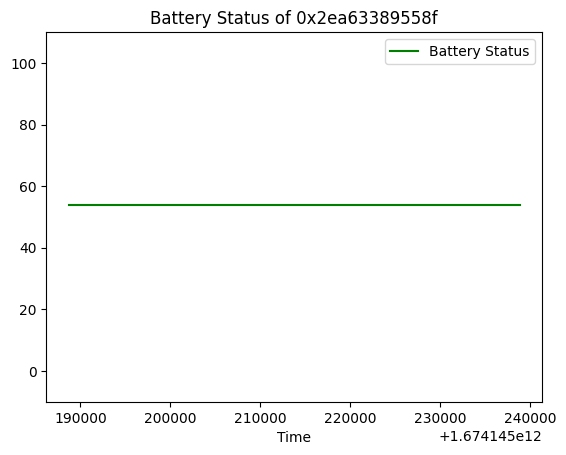

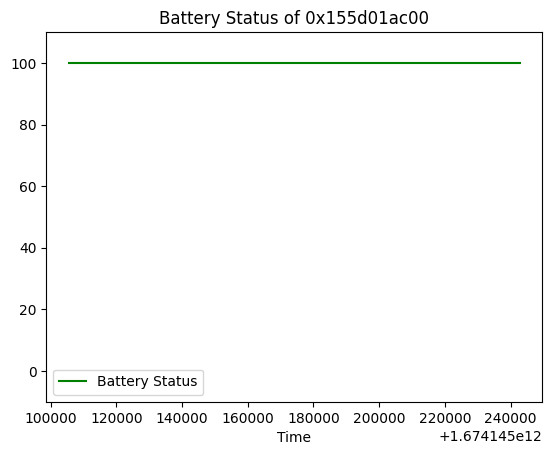

In [16]:
mac_addresses = devices_dict['mac_addresses']

# modify with your timestamps
devices_get_params = {
    'from': 0,
    'to': 1674145383559,
}

for mac_address in mac_addresses:

    device = f'/device/{mac_address}' 
    response_device = requests.get(url=str(host + device), params=devices_get_params)

    if response_device.status_code == 200:
    # Successfully received a response_device from the endpoint
        device_dict = response_device.json()

        plot = {
            'Battery Status': pd.Series(device_dict['battery_levels']),
            'Time': pd.Series(device_dict['timestamps'])
        }
        plot_df = pd.DataFrame(plot)
        plot_df.plot.line(
            x = 'Time', 
            y = 'Battery Status', 
            color = 'green', 
            title=str(f'Battery Status of {mac_address}'),
            ylim=[-10,110])

    else:
        # Something went wrong with the request
        response = [resp.decode().strip() for resp in response_device.iter_lines() if '<p>' in resp.decode()]
        response = re.sub("<p>", "", response[0])
        response = re.sub("</p>", "", response)
        print(f'Error - '+ str(response))

`DELETE device/{mac_address}` endpoint:

In [5]:
to_delete = mac_addresses[len(mac_addresses) - 1]
device = f'/device/{to_delete}' 
response_device = requests.delete(url=str(host + device))

if response_device.status_code == 200:
    # Successfully received a response_device from the endpoint
    print(str(response_device.status_code) + f" OK. Data associated with MAC address {to_delete} deleted.")
else:
    # Something went wrong with the request
    response = [resp.decode().strip() for resp in response_device.iter_lines() if '<p>' in resp.decode()]
    response = re.sub("<p>", "", response[0])
    response = re.sub("</p>", "", response)
    print(f'Error - '+ str(response))

200 OK. Data associated with MAC address 0x2ea63389558f deleted.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=28d88834-5f02-41a4-b15c-b006e84e3419' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>